In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.random import set_seed
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(X_train, y_train) , (X_test, y_test) = load_data()

X_train = X_train / 255
X_test = X_test / 255

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# tworzenie ANN
def create_ANN():
  set_seed(0)

  model = Sequential()
  model.add( Flatten(input_shape=(28,28)) ) # adapter danych wejściowych
  model.add( Dense(128, activation="relu") )
  model.add( Dropout(0.2))

  model.add( Dense(10, activation="softmax") )  # warstwa wyjściowa
  
  model.compile(optimizer="rmsprop", metrics="accuracy", loss="sparse_categorical_crossentropy")
  
  return model

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
model = create_ANN()
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 4ms/step - loss: 0.3201 - accuracy: 0.9075 - val_loss: 0.1590 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1613 - accuracy: 0.9528 - val_loss: 0.1219 - val_accuracy: 0.9663
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1297 - accuracy: 0.9628 - val_loss: 0.1089 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1122 - accuracy: 0.9680 - val_loss: 0.1045 - val_accuracy: 0.9716
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1012 - accuracy: 0.9717 - val_loss: 0.1034 - val_accuracy: 0.9727
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0966 - accuracy: 0.9732 - val_loss: 0.1073 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0890 - accuracy: 0.9763 - val_loss: 0.1061 - val_accuracy

## Model checkpoint - zapis modelu w trakcie uczenia

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
!rm -Rf checkpoint
!mkdir checkpoint

_filepath = "checkpoint/ann-{epoch:02d}-{val_accuracy:.3f}.h5"
checkpoint = ModelCheckpoint(monitor="val_loss", filepath=_filepath)

In [10]:
model = create_ANN()
model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3201 - accuracy: 0.9075 - val_loss: 0.1590 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1613 - accuracy: 0.9528 - val_loss: 0.1219 - val_accuracy: 0.9663
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1297 - accuracy: 0.9628 - val_loss: 0.1089 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1122 - accuracy: 0.9680 - val_loss: 0.1045 - val_accuracy: 0.9716
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1012 - accuracy: 0.9717 - val_loss: 0.1034 - val_accuracy: 0.9727
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0966 - accuracy: 0.9732 - val_loss: 0.1073 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0890 - accuracy: 0.9763 - val_loss: 0.1061 - val_accuracy:

In [11]:
from tensorflow.keras.models import load_model

In [12]:
model2 = load_model("checkpoint/ann-09-0.975.h5")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# zapisz najlepszej wersji sieci

checkpoint = ModelCheckpoint(monitor="val_accuracy", filepath="best-ann.h5", save_best_only=True, verbose=1)

model = create_ANN()
model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[checkpoint])

In [14]:
# Early stopping 
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
es = EarlyStopping(monitor="val_loss", patience=3, min_delta=0.02, verbose=1)

model = create_ANN()
model.fit(X_train, y_train, epochs=15, validation_split=0.2, callbacks=[es])

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3201 - accuracy: 0.9075 - val_loss: 0.1590 - val_accuracy: 0.9546
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1613 - accuracy: 0.9528 - val_loss: 0.1219 - val_accuracy: 0.9663
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1297 - accuracy: 0.9628 - val_loss: 0.1089 - val_accuracy: 0.9696
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1122 - accuracy: 0.9680 - val_loss: 0.1045 - val_accuracy: 0.9716
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1012 - accuracy: 0.9717 - val_loss: 0.1034 - val_accuracy: 0.9727
Epoch 5: early stopping


In [18]:
# Tensorboard
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime as dt

In [19]:
!rm -Rf logs

tb = TensorBoard(log_dir="logs/"+dt.now().strftime("%Y%m%d-%H%M%S") )
model = create_ANN()
model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[tb])

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3201 - accuracy: 0.9075 - val_loss: 0.1590 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1613 - accuracy: 0.9528 - val_loss: 0.1219 - val_accuracy: 0.9663
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1297 - accuracy: 0.9628 - val_loss: 0.1089 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1122 - accuracy: 0.9680 - val_loss: 0.1045 - val_accuracy: 0.9716
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1012 - accuracy: 0.9717 - val_loss: 0.1034 - val_accuracy: 0.9727
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0966 - accuracy: 0.9732 - val_loss: 0.1073 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0890 - accuracy: 0.9763 - val_loss: 0.1061 - val_accuracy:

In [20]:
dt.now()

datetime.datetime(2022, 2, 16, 13, 44, 33, 981543)

In [21]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

In [23]:
# manulane przekazywanie danych walidacyjnych
X_train.shape

(60000, 28, 28)

In [25]:
X_train[0:55000].shape, X_train[55000:].shape

((55000, 28, 28), (5000, 28, 28))

In [26]:
LIMIT = 55000
model = create_ANN()
model.fit(X_train[:LIMIT], y_train[:LIMIT], epochs=10, validation_data=(X_train[LIMIT:], y_train[LIMIT:]) )

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3034 - accuracy: 0.9123 - val_loss: 0.1136 - val_accuracy: 0.9674
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1556 - accuracy: 0.9550 - val_loss: 0.0993 - val_accuracy: 0.9688
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1220 - accuracy: 0.9652 - val_loss: 0.0829 - val_accuracy: 0.9782
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1083 - accuracy: 0.9699 - val_loss: 0.0822 - val_accuracy: 0.9776
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0977 - accuracy: 0.9724 - val_loss: 0.0817 - val_accuracy: 0.9794
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0926 - accuracy: 0.9747 - val_loss: 0.0814 - val_accuracy: 0.9812
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0859 - accuracy: 0.9766 - val_loss: 0.0785 - val_accuracy:

In [27]:
from tensorflow.keras.utils import plot_model

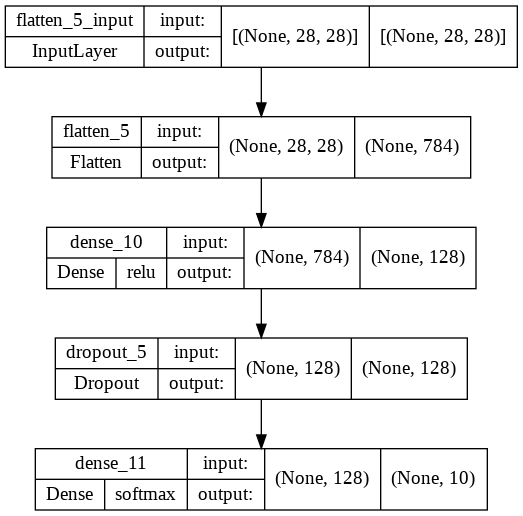

In [30]:
plot_model(model, to_file="ann.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)